<a href="https://colab.research.google.com/github/pratikasarkar/Capstone_Project/blob/pratik_workingBranch/Used_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/gdrive/My Drive/autos.csv',encoding='latin_1')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0,golf,150000,0,benzin,volkswagen,NaN,24-03-2016 00:00,0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190,NaN,125000,5,diesel,audi,ja,24-03-2016 00:00,0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0,90480,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75,golf,150000,6,benzin,volkswagen,nein,17-03-2016 00:00,0,91074,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69,fabia,90000,7,diesel,skoda,nein,31-03-2016 00:00,0,60437,06-04-2016 10:17


# Converting all German values to English

In [4]:
df['seller'].value_counts()

privat        371719
gewerblich         3
Name: seller, dtype: int64

In [5]:
df['seller'].replace({'privat':'private',
                      'gewerblich':'commercial'},
                     inplace = True)
df['seller'].head()

0    private
1    private
2    private
3    private
4    private
Name: seller, dtype: object

In [6]:
df['offerType'].value_counts()

Angebot    371710
Gesuch         12
Name: offerType, dtype: int64

In [7]:
df['offerType'].replace({'Angebot':'offer',
                      'Gesuch':'application'},
                     inplace = True)
df['offerType'].head()

0    offer
1    offer
2    offer
3    offer
4    offer
Name: offerType, dtype: object

In [8]:
df['abtest'].value_counts()

test       192683
control    179039
Name: abtest, dtype: int64

In [9]:
df['vehicleType'].value_counts()

limousine     95936
kleinwagen    80077
kombi         67602
bus           30214
cabrio        22911
coupe         19023
suv           14714
andere         3359
Name: vehicleType, dtype: int64

In [10]:
df['vehicleType'].replace({'kleinwagen':'small car',
                      'kombi':'microbus',
                      'cabrio':'convertible',
                      'andere' : 'other'},
                     inplace = True)
df['vehicleType'].head()

0          NaN
1        coupe
2          suv
3    small car
4    small car
Name: vehicleType, dtype: object

In [11]:
df['gearbox'].value_counts()

manuell      274355
automatik     77150
Name: gearbox, dtype: int64

In [12]:
df['gearbox'].replace({'manuell':'manual',
                      'automatik':'automatic'},
                     inplace = True)
df['gearbox'].head()

0       manual
1       manual
2    automatic
3       manual
4       manual
Name: gearbox, dtype: object

In [13]:
orig_list = list(df['model'].value_counts().index)
converted_list = ['golf','other','3s','polo','corsa','astra','passat','a4','cclass','5s','eclass','a3','a6','focus','fiesta','transporter','twingo','2series','fortwo','aclass','vectra','1s','mondeo','clio','touran','3series','punto','zafira','megane','ibiza','ka','lupo','xseries','octavia','cooper','fabia','clk','micra','caddy','80','sharan','scenic','omega','slk','leon','laguna','civic','tt','1stseries','6series','iseries','galaxy','mclass','7s','meriva','yaris','great','mxseries','a5','kangoo','911','bclass','500','tiguan','vito','escort','one','arosa','zseries','bora','colt','beetle','berlingo','sprinter','tigra','v40','transit','touareg','fox','swift','insignia','c_max','corolla','panda','seicento','sl','v70','4series','scirocco','156','a1','primera','espace','grand','stilo','almera','a8','147','avensis','qashqai','eos','c3','c5','signum','Beetle','s_max','5series','q5','c4','matiz','ducato','agila','aygo','viano','getz','601','combo','100','carisma','cayenne','boxster','alhambra','cordoba','c2','superb','c1','kuga','forfour','rio','jetta','cuore','a2','altea','cadet','rav','picanto','sorento','mseries','accord','crseries','up','q7','vivaro','toledo','voyager','xcseries','Bravo','santa','doblo','logan','mode','verso','ptcruiser','cl','sportage','jazz','fusion','sandero','mustang','roomster','carnival','6s','ceed','gallant','v50','q3','tucson','lancer','auris','impreza','phaeton','freelander','glk','calibra','pajero','x_trail','850','159','jimny','ypsilon','spider','duster','clubman','yeti','cseries','cc','roadster','cherokee','x_type','gclass','captiva','vclass','wrangler','legacy','s60','300c','rxseries','defender','justy','sirion','forester','outlander','grade','niva','s_type','spark','r19','navara','cxseries','aveo','900','antara','90','juke','discovery','exeo','range_rover_sport','kalos','range_rover','citigo','lanos','mii','crossfire','range_rover_evoque','gl','nubira','move','lybra','145','v60','croma','amarok','delta','terios','lodgy','9000','charade','b_max','musa','materia','200','kappa','samara','elefantino','i3','kalina','serie_2','rangerover','serie_3','serie_1','discovery_sport']

In [14]:
df['model'].replace(dict(zip(orig_list,converted_list)),inplace = True)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,0,golf,150000,0,benzin,volkswagen,NaN,24-03-2016 00:00,0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190,NaN,125000,5,diesel,audi,ja,24-03-2016 00:00,0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0,90480,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75,golf,150000,6,benzin,volkswagen,nein,17-03-2016 00:00,0,91074,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69,fabia,90000,7,diesel,skoda,nein,31-03-2016 00:00,0,60437,06-04-2016 10:17


In [15]:
df['monthOfRegistration'].value_counts()

0     37695
3     36186
6     33194
4     30939
5     30643
7     28979
10    27354
11    25499
12    25395
9     25083
1     24567
8     23775
2     22414
Name: monthOfRegistration, dtype: int64

In [16]:
df['fuelType'].value_counts()

benzin     223974
diesel     107802
lpg          5379
cng           571
hybrid        281
andere        208
elektro       104
Name: fuelType, dtype: int64

In [17]:
df['fuelType'].replace({'benzin':'petrol',
                      'andere':'other',
                      'elektro':'electric'},
                     inplace = True)
df['fuelType'].head()

0    petrol
1    diesel
2    diesel
3    petrol
4    diesel
Name: fuelType, dtype: object

In [18]:
df['brand'].value_counts()

volkswagen        79672
bmw               40291
opel              40153
mercedes_benz     35339
audi              32889
ford              25584
renault           17988
peugeot           11032
fiat               9677
seat               7023
mazda              5697
skoda              5645
smart              5251
citroen            5185
nissan             5040
toyota             4699
sonstige_autos     3983
hyundai            3649
mini               3397
volvo              3328
mitsubishi         3062
honda              2838
kia                2556
alfa_romeo         2348
suzuki             2330
porsche            2215
chevrolet          1847
chrysler           1454
dacia               900
jeep                808
daihatsu            806
subaru              779
land_rover          772
jaguar              621
trabant             592
daewoo              543
saab                531
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [19]:
df['notRepairedDamage'].value_counts()

nein    263325
ja       36302
Name: notRepairedDamage, dtype: int64

In [20]:
df['notRepairedDamage'].replace({'nein':'No',
                      'ja':'Yes'},
                     inplace = True)
df['notRepairedDamage'].head()

0    NaN
1    Yes
2    NaN
3     No
4     No
Name: notRepairedDamage, dtype: object

In [21]:
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,0,golf,150000,0,petrol,volkswagen,NaN,24-03-2016 00:00,0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190,NaN,125000,5,diesel,audi,Yes,24-03-2016 00:00,0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0,90480,05-04-2016 12:47


# Exploring the dataset

In [22]:
df.shape

(371723, 20)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371723 entries, 0 to 371722
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371723 non-null  object 
 1   name                 371723 non-null  object 
 2   seller               371722 non-null  object 
 3   offerType            371722 non-null  object 
 4   price                371722 non-null  float64
 5   abtest               371722 non-null  object 
 6   vehicleType          333836 non-null  object 
 7   yearOfRegistration   371722 non-null  float64
 8   gearbox              351505 non-null  object 
 9   powerPS              371723 non-null  int64  
 10  model                351232 non-null  object 
 11  kilometer            371723 non-null  int64  
 12  monthOfRegistration  371723 non-null  int64  
 13  fuelType             338319 non-null  object 
 14  brand                371723 non-null  object 
 15  notRepairedDamage

In [24]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371723 entries, 0 to 371722
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371723 non-null  datetime64[ns]
 1   name                 371723 non-null  object        
 2   seller               371722 non-null  object        
 3   offerType            371722 non-null  object        
 4   price                371722 non-null  float64       
 5   abtest               371722 non-null  object        
 6   vehicleType          333836 non-null  object        
 7   yearOfRegistration   371722 non-null  float64       
 8   gearbox              351505 non-null  object        
 9   powerPS              371723 non-null  int64         
 10  model                351232 non-null  object        
 11  kilometer            371723 non-null  int64         
 12  monthOfRegistration  371723 non-null  int64         
 13  fuelType      

In [26]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:00,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-07-04 03:16:00
1,2016-03-24 10:58:00,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190,NaN,125000,5,diesel,audi,Yes,2016-03-24,0,66954,2016-07-04 01:46:00
2,2016-03-14 12:52:00,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-05-04 12:47:00
3,2016-03-17 16:54:00,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75,golf,150000,6,petrol,volkswagen,No,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69,fabia,90000,7,diesel,skoda,No,2016-03-31,0,60437,2016-06-04 10:17:00


In [27]:
def get_missing_val_count_df(df):
  missing_count_list = []
  for col in df.columns:
    missing_count_list.append(df[col].isnull().sum())
  missing_count_df = pd.DataFrame(missing_count_list,columns=['count'],index = df.columns)
  return missing_count_df.sort_values('count',ascending=False)
get_missing_val_count_df(df)

,count
notRepairedDamage,72096
vehicleType,37887
fuelType,33404
model,20491
gearbox,20218
seller,1
offerType,1
price,1
abtest,1
yearOfRegistration,1


## Price

In [28]:
df['price'].describe()

count    3.717220e+05
mean     1.729044e+04
std      3.587017e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

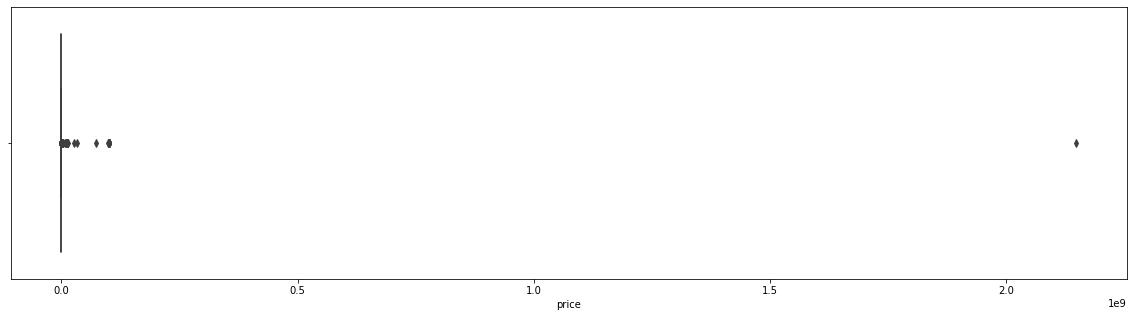

In [29]:
plt.figure(figsize = (20,5))
sns.boxplot(df['price'])

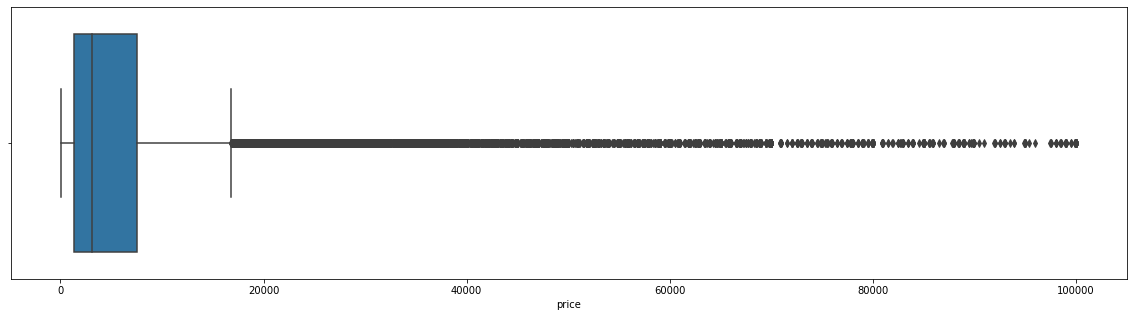

In [30]:
plt.figure(figsize = (20,5))
sns.boxplot(df[(df['price']>=100) & (df['price']<=100000)]['price'])

### Outlier detection using Isolation Forest

In [31]:
dfprice = df[(df['price'].isnull() == False)]['price']

[[0.00000000e+00]
 [5.77712281e+03]
 [1.15542456e+04]
 ...
 [2.14747209e+09]
 [2.14747787e+09]
 [2.14748365e+09]]


Text(0.5, 1.0, 'price')

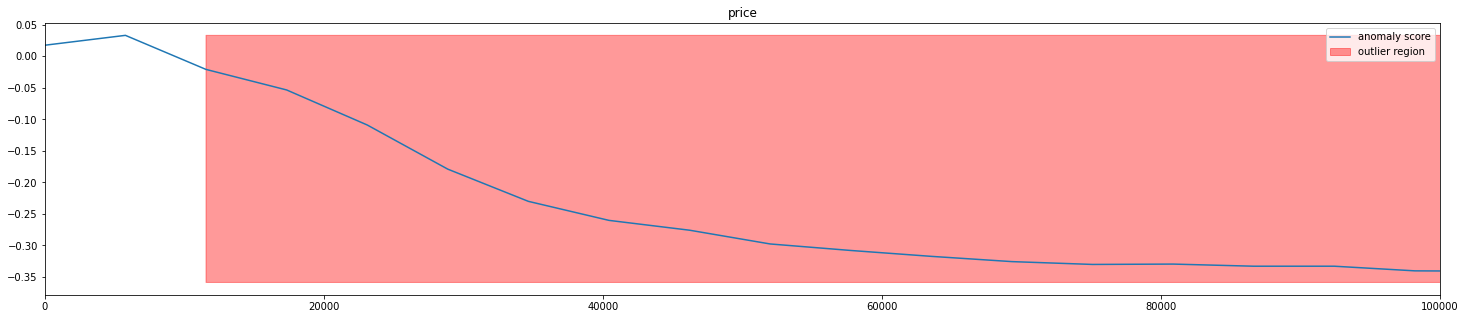

In [32]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(dfprice.values.reshape(-1,1))

xx = np.linspace(dfprice.min(), dfprice.max(), len(df)).reshape(-1,1)
print(xx)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(25,5))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
plt.legend()
plt.xlim(0, 100000)
# plt.axis([0,100000,0,0])
plt.title('price')

If we see from the above plot, almost all data point above 12000 seems to come under outliers, but dropping all of those does not seem to be a feasible solution. We can also see that data points after 100000 have consistently very low anamoly score, so we can go ahead and drop those data points, and the remaining outliers can be handled further using transformation techniques. Also data points with price below 100 also seem to be very low as far as price of a used car is concerned, so we will also drop those data points which have price below 100.

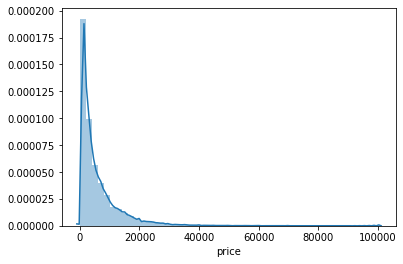

In [33]:
sns.distplot(df[(df['price']>=100) & (df['price']<=100000)]['price'])

In [34]:
df[(df['price']>=100) & (df['price']<=100000)].shape

(357989, 20)

In [35]:
df2 = df[(df['price']>=100) & (df['price']<=100000)]

### Checking for Missing Values

In [36]:
get_missing_val_count_df(df2)

,count
notRepairedDamage,65228
vehicleType,32960
fuelType,28787
model,17709
gearbox,16627
kilometer,0
postalCode,0
nrOfPictures,0
dateCreated,0
brand,0


No missing values for price feature.

### Statistical Analysis
Check for Normality - Shapiro Test

H0 : Price is normally distributed

In [37]:
from scipy.stats import shapiro
shapiro(df2['price'])

(0.6681995987892151, 0.0)

As we can see the pvalue is less than 0.05. So we can reject the null hypothesis that price is normally distributed.
We will use log transformation for converting price to normal distribution after we are done with any imputation in our dataset.

## Kilometers
Number of kilometers car has driven

In [38]:
df2['kilometer'].describe()

count    357989.000000
mean     125871.381523
std       39527.956707
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

In [39]:
df2['kilometer'].value_counts()

150000    231629
125000     37239
100000     15356
90000      12327
80000      10862
70000       9641
60000       8568
50000       7510
40000       6300
30000       5892
20000       5454
5000        5409
10000       1802
Name: kilometer, dtype: int64

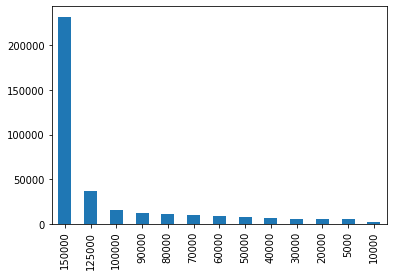

In [40]:
df2['kilometer'].value_counts().plot(kind = 'bar')

Seems like the website had certain options from which a user could select the number of kilometers the car has been driven instead of providing a place to put in an exact number. We could use this as a categorical variable instead of continous variable.

### Statistical Analysis
Is there any discrepancy in avg price with respect to Kilometers.

H0 : avg_price_5000_km = avg_price_10000_km = avg_price_20000_km = avg_price_30000_km = ..... = avg_price_150000_km

H1 : avg_price_5000_km != avg_price_10000_km != avg_price_20000_km != avg_price_30000_km != ..... != avg_price_150000_km

In [41]:
from scipy.stats import f_oneway
def oneway_posthoc(i):
    cat = {}
    for j in range(df2[i].nunique()):
        if pd.isna(df2[i].unique()[j]) == False:
            cat[df2[i].unique()[j]] = df2[df2[i] == df2[i].unique()[j]]['price']
    tstat,pval = f_oneway(*list(cat.values()))
    print(f'pvalue for {i} is {pval}')
    print()
    for k in cat:
        print(f'Avg price of car for {i} = {k} is ',cat[k].mean())

In [42]:
oneway_posthoc('kilometer')

pvalue for kilometer is 0.0

Avg price of car for kilometer = 150000 is  3766.4821805559754
Avg price of car for kilometer = 125000 is  6232.123123606972
Avg price of car for kilometer = 90000 is  8528.65514723777
Avg price of car for kilometer = 30000 is  15508.95027155465
Avg price of car for kilometer = 70000 is  10781.524115755627
Avg price of car for kilometer = 5000 is  7055.0443704936215
Avg price of car for kilometer = 100000 is  7710.722584006252
Avg price of car for kilometer = 60000 is  11753.263305322129
Avg price of car for kilometer = 20000 is  16271.697653098643
Avg price of car for kilometer = 80000 is  9448.671331246547
Avg price of car for kilometer = 50000 is  13184.426764314248
Avg price of car for kilometer = 40000 is  14821.194285714286
Avg price of car for kilometer = 10000 is  20038.69089900111


We can see from the oneway test that the price of used car is affected by kilometers as the pvalue is less than 0.05

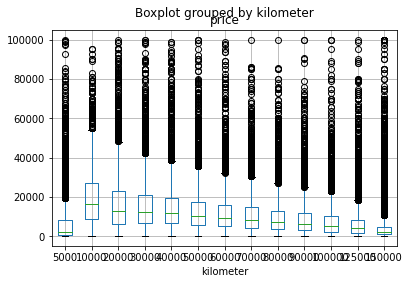

In [43]:
df2.boxplot(column='price',by = 'kilometer')

As we can see quite evidently that the average price of a used car starts decreasing as the number of kilometers it has run increases.

### NotRepairedDamaged 
If the car has a damage which is not repaired yet

In [44]:
df2['notRepairedDamage'].describe()

count     292761
unique         2
top           No
freq      259035
Name: notRepairedDamage, dtype: object

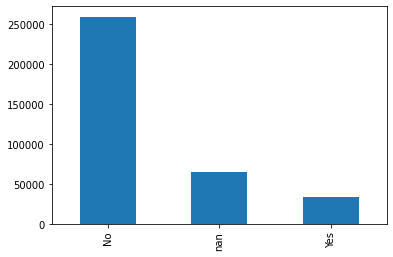

In [45]:
df2['notRepairedDamage'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for notRepairedDamaged does not really make sense because we will not be able to determine whether the car was damaged or not by using other features in the dataset. So we will drop the NA values.

In [46]:
df2 = df2[df2['notRepairedDamage'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to notRepairedDamage.

H0 : avg_price_notRepaired = avg_price_Repaired

H1 : avg_price_notRepaired != avg_price_Repaired

In [47]:
price_repaired = df2.loc[df2['notRepairedDamage'] == 'No','price']
price_notRepaired = df2.loc[df2['notRepairedDamage'] == 'Yes','price']

Shapiro Test - Test for Normality

In [48]:
print(shapiro(price_repaired))
print(shapiro(price_notRepaired))

(0.7013095617294312, 0.0)
(0.4996538758277893, 0.0)


The prices for both repaired and not repaired cars is not normally distributed as pvalue is less than 0.05.

Bartlett Test - Test for equal variance

In [49]:
from scipy.stats import bartlett
print(bartlett(price_repaired,price_notRepaired))

BartlettResult(statistic=24687.933059112584, pvalue=0.0)


The variance in price for repaired car is not equal to that in a not repaired car as pvallue is less that 0.05. So for a non parametric independent 2 sample t-test we will go with manwhitneyu test.

Manwhitneyu Test

H0 : Average price of repaired car is equal to average price of not repaired car.

In [50]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(price_repaired,price_notRepaired))

MannwhitneyuResult(statistic=1884377181.5, pvalue=0.0)


We can see from the manwhitneyu test that the price of used car is affected by the fact that whether its repaired or not as the pvalue is less than 0.05

Post hoc analysis

In [51]:
print('Avg price for car which has been repaired : ',price_repaired.mean())
print('Avg price for car which has not been repaired : ',price_notRepaired.mean())

Avg price for car which has been repaired :  6925.527785820449
Avg price for car which has not been repaired :  2251.102472869596


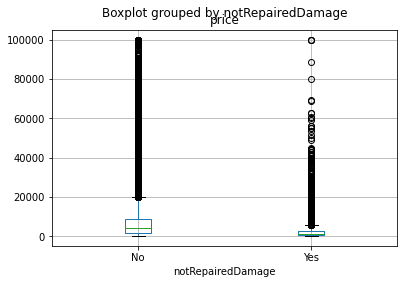

In [52]:
df2.boxplot(column='price',by = 'notRepairedDamage')

As we can see quite evidently that the average price of a used car which has been repaired is higher that that which has not been repaired.

### VehicleType

In [53]:
df2['vehicleType'].describe()

count        277009
unique            8
top       limousine
freq          80450
Name: vehicleType, dtype: object

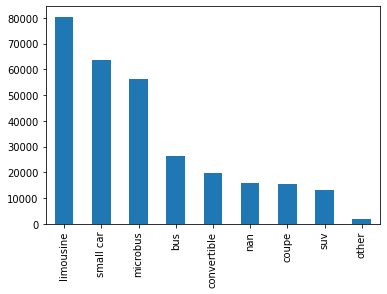

In [54]:
df2['vehicleType'].value_counts(dropna = False).plot(kind = 'bar')

We can impute the values of vehicleType depending on model,brand and price of the car.

### Statistical Analysis
Is there any discrepancy in avg price with respect to vehicleType.

H0 : avg_price_limousine = avg_price_small_car = avg_price_microbus = ..... = avg_price_other

H1 : avg_price_limousine != avg_price_small_car != avg_price_microbus != ..... != avg_price_other

In [55]:
oneway_posthoc('vehicleType')

pvalue for vehicleType is 0.0

Avg price of car for vehicleType = coupe is  11298.064100096246
Avg price of car for vehicleType = small car is  3070.7935288201647
Avg price of car for vehicleType = limousine is  6349.402747047856
Avg price of car for vehicleType = convertible is  10691.817306237708
Avg price of car for vehicleType = microbus is  6260.084041682968
Avg price of car for vehicleType = suv is  13635.447858903266
Avg price of car for vehicleType = bus is  7007.233088151225


We can see from the oneway test that the price of used car is affected by vehcleType as the pvalue is less than 0.05

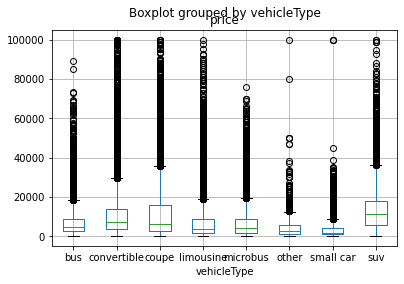

In [56]:
df2.boxplot(column='price',by = 'vehicleType')

As we can see quite evidently that the average price of a used car varies significantly for different type of vehicles.

### FuelType

In [57]:
df2['fuelType'].describe()

count     277426
unique         7
top       petrol
freq      180556
Name: fuelType, dtype: object

petrol      180556
diesel       91622
NaN          15335
lpg           4312
cng            504
hybrid         253
other           94
electric        85
Name: fuelType, dtype: int64


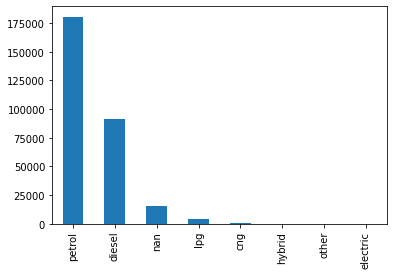

In [58]:
print(df2['fuelType'].value_counts(dropna = False))
df2['fuelType'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for fuelType does not really make sense because we will not be able to determine what type of fuelType the car belongs to by using other features in the dataset. So we will drop the NA values.

In [59]:
df2 = df2[df2['fuelType'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to fuelType.

H0 : avg_price_petrol_car = avg_price_diesel_car = avg_price_lpg_car = ..... = avg_price_other_fuelType

H1 : avg_price_petrol_car != avg_price_diesel_car != avg_price_lpg_car != ..... != avg_price_other_fuelType

In [60]:
oneway_posthoc('fuelType')

pvalue for fuelType is 0.0

Avg price of car for fuelType = diesel is  9086.144790552487
Avg price of car for fuelType = petrol is  5278.813381997829
Avg price of car for fuelType = lpg is  4670.055658627087
Avg price of car for fuelType = other is  5353.063829787234
Avg price of car for fuelType = hybrid is  13521.92490118577
Avg price of car for fuelType = cng is  4991.855158730159
Avg price of car for fuelType = electric is  12957.552941176471


We can see from the oneway test that the price of used car is affected by fuelType as the pvalue is less than 0.05

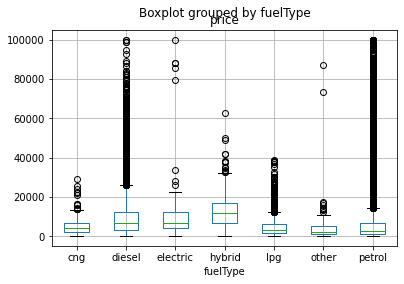

In [61]:
df2.boxplot(column='price',by = 'fuelType')

As we can see quite evidently that the average price of a used car varies significantly for different fueltypes of vehicles.

### Model

In [62]:
df2['model'].describe()

count     269577
unique       250
top         golf
freq       22030
Name: model, dtype: object

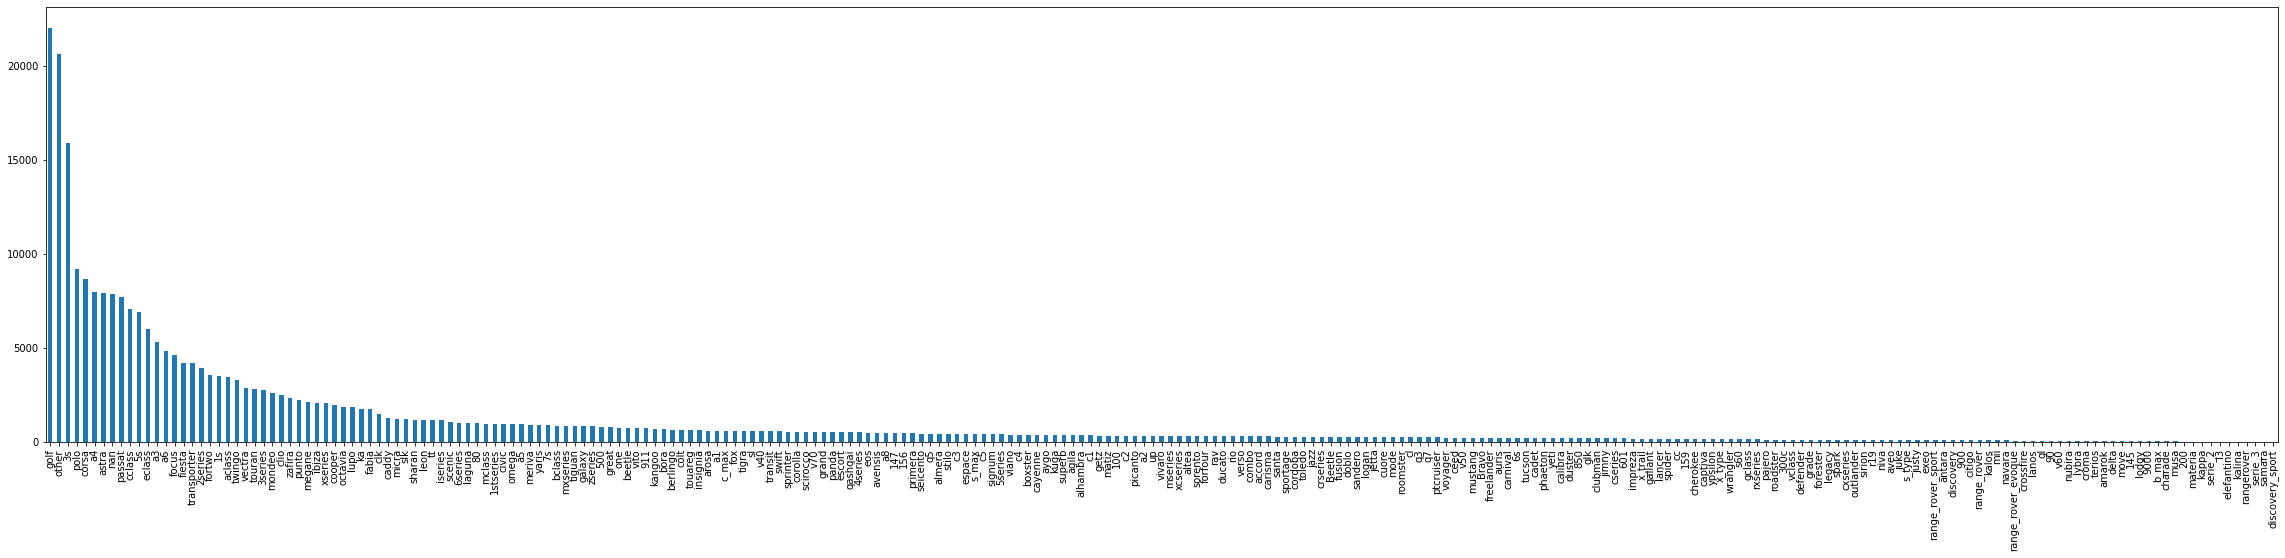

In [63]:
plt.figure(figsize=(40,8))
df2['model'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for model does not really make sense because we will not be able to determine what type of model the car belongs to by using other features in the dataset. So we will drop the NA values.

In [64]:
df2 = df2[df2['model'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to model.

H0 : avg_price_golf = avg_price_3s = avg_price_polo = ..... = avg_price_discovery_sport

H1 : avg_price_golf != avg_price_3s != avg_price_polo != ..... != avg_price_discovery_sport

In [65]:
oneway_posthoc('model')

pvalue for model is 0.0

Avg price of car for model = golf is  5554.056241488879
Avg price of car for model = fabia is  4407.027522935779
Avg price of car for model = 3s is  6544.488070506767
Avg price of car for model = 2series is  3426.109215885947
Avg price of car for model = 3series is  3664.7937842778792
Avg price of car for model = passat is  5525.541098558629
Avg price of car for model = r19 is  13893.712871287129
Avg price of car for model = twingo is  1657.5620036652413
Avg price of car for model = c_max is  6575.927586206896
Avg price of car for model = aclass is  4480.13422818792
Avg price of car for model = scirocco is  11925.33088235294
Avg price of car for model = 5s is  8766.40488301119
Avg price of car for model = meriva is  4825.797740112995
Avg price of car for model = arosa is  1211.047619047619
Avg price of car for model = other is  7558.672264013589
Avg price of car for model = civic is  3384.0
Avg price of car for model = transporter is  11192.064354066986
Avg pri

We can see from the oneway test that the price of used car is affected by model of the car as the pvalue is less than 0.05

As we can see quite evidently that the average price of a used car varies significantly for different models of vehicles.

### Gearbox

In [66]:
df2['gearbox'].describe()

count     264509
unique         2
top       manual
freq      203311
Name: gearbox, dtype: object

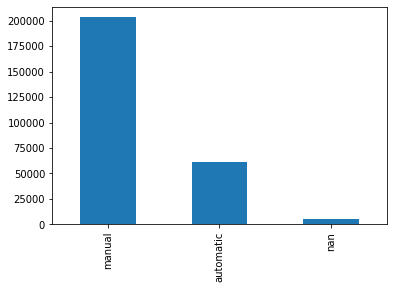

In [67]:
df2['gearbox'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for gearBox does not really make sense because we will not be able to determine what type of gearBox the car belongs to by using other features in the dataset. So we will drop the NA values.

In [68]:
df2 = df2[df2['gearbox'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to the type of gearbox.

H0 : avg_price_manual = avg_price_automatic

H1 : avg_price_manual != avg_price_automatic

In [69]:
price_manual = df2.loc[df2['gearbox'] == 'manual','price']
price_automatic = df2.loc[df2['gearbox'] == 'automatic','price']

Shapiro Test - Test for Normality

In [70]:
print(shapiro(price_manual))
print(shapiro(price_automatic))

(0.699974775314331, 0.0)
(0.8082908391952515, 0.0)


The prices for cars with both manual and automatic gearbox are not normally distributed as pvalue is less than 0.05.

Bartlett Test - Test for equal variance

In [71]:
from scipy.stats import bartlett
print(bartlett(price_manual,price_automatic))

BartlettResult(statistic=40107.98454035753, pvalue=0.0)


The variance in price for car with automatic gearbox is not equal to the car with manual gearbox as pvalue is less that 0.05. So for a non parametric independent 2 sample t-test we will go with manwhitneyu test.

Manwhitneyu Test

H0 : Average price of car with automatic gearbox is equal to average price of car with manual gearbox.

In [72]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(price_manual,price_automatic))

MannwhitneyuResult(statistic=3635042605.0, pvalue=0.0)


We can see from the manwhitneyu test that the price of used car is affected by the fact that whether its an automatic or manual gearbox car as the pvalue is less than 0.05

Post hoc analysis

In [73]:
print('Avg price for car which has manual gearbox : ',price_manual.mean())
print('Avg price for car which has automatic gearbox : ',price_automatic.mean())

Avg price for car which has manual gearbox :  5181.729876888117
Avg price for car which has automatic gearbox :  11255.807085198863


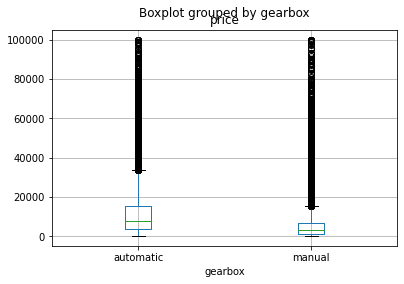

In [74]:
df2.boxplot(column='price',by = 'gearbox')

As we can see quite evidently that the average price of a used car which has an automatic gearbox is higher than that which has a manual gearbox.

### Seller

In [75]:
df2['seller'].describe()

count      264509
unique          2
top       private
freq       264507
Name: seller, dtype: object

private       264507
commercial         2
Name: seller, dtype: int64


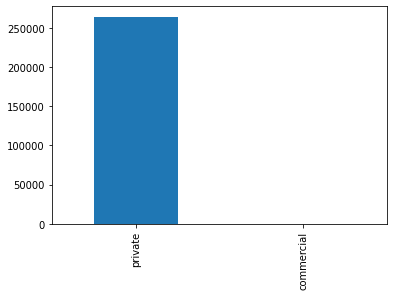

In [76]:
print(df2['seller'].value_counts(dropna = False))
df2['seller'].value_counts(dropna = False).plot(kind = 'bar')

The data in this features seems extremely imbalanced. So we will consider dropping this feature.

### OfferType

In [77]:
df2['offerType'].describe()

count     264509
unique         2
top        offer
freq      264508
Name: offerType, dtype: object

offer          264508
application         1
Name: offerType, dtype: int64


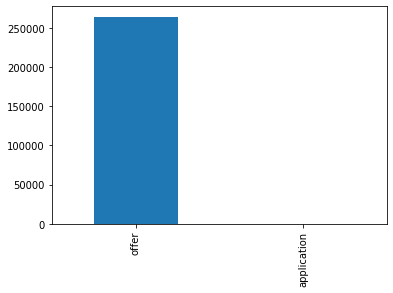

In [78]:
print(df2['offerType'].value_counts(dropna = False))
df2['offerType'].value_counts(dropna = False).plot(kind = 'bar')

The data in this features seems extremely imbalanced. So we will consider dropping this feature.

### ABTEST

In [79]:
df2['abtest'].describe()

count     264509
unique         2
top         test
freq      137245
Name: abtest, dtype: object

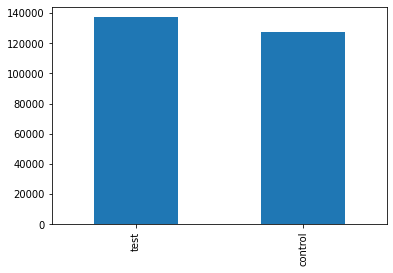

In [80]:
df2['abtest'].value_counts(dropna = False).plot(kind = 'bar')

### Statistical Analysis
Is there any discrepancy in avg price with respect to abtest.

H0 : avg_price_test = avg_price_control

H1 : avg_price_test != avg_price_control

In [81]:
price_test = df2.loc[df2['abtest'] == 'test','price']
price_control = df2.loc[df2['abtest'] == 'control','price']

Shapiro Test - Test for Normality

In [82]:
print(shapiro(price_test))
print(shapiro(price_control))

(0.7027723789215088, 0.0)
(0.7039779424667358, 0.0)


The prices for cars with both test and control are not normally distributed as pvalue is less than 0.05.

Bartlett Test - Test for equal variance

In [83]:
from scipy.stats import bartlett
print(bartlett(price_test,price_control))

BartlettResult(statistic=4.216303883829881, pvalue=0.040037284097129984)


The variance in price for car with control abtest is not equal to the car with test abtest as pvalue is less that 0.05. So for a non parametric independent 2 sample t-test we will go with manwhitneyu test.

Manwhitneyu Test

H0 : Average price of car with automatic gearbox is equal to average price of car with manual gearbox.

In [84]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(price_test,price_control))

MannwhitneyuResult(statistic=8718386172.0, pvalue=0.2255276517384996)


We can see from the manwhitneyu test that the price of used car is not affected by the feature abtest as the pvalue is greater than 0.05. So we will prefer dropping this column.

### Year Of Registration

In [85]:
df2['yearOfRegistration'].describe()

count    264509.000000
mean       2003.738051
std          14.631788
min        1600.000000
25%        2000.000000
50%        2004.000000
75%        2008.000000
max        6200.000000
Name: yearOfRegistration, dtype: float64

In [86]:
df2.loc[(df2['yearOfRegistration']<1923) | (df2['yearOfRegistration']>2020),'yearOfRegistration'] = np.nan

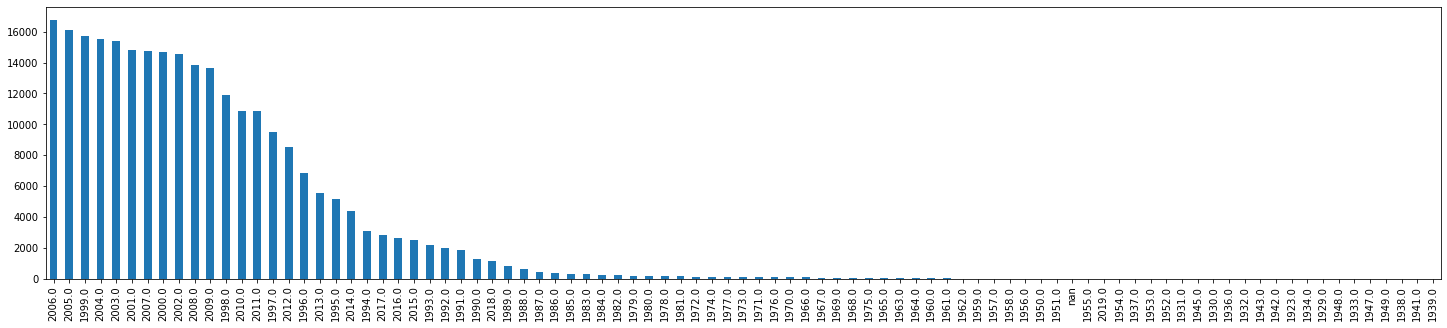

In [87]:
plt.figure(figsize=(25,5))
df2['yearOfRegistration'].value_counts(dropna = False).plot(kind = 'bar')

In [88]:
df2 = df2[df2['yearOfRegistration'].isnull() == False]

We will be combining this column with monthOfRegistration to convert it to the age of vehicle

### Power PS

In [89]:
df2['powerPS'].describe()

count    264501.000000
mean        125.225776
std         144.991381
min           0.000000
25%          75.000000
50%         116.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

[[0.00000000e+00]
 [5.38036490e-02]
 [1.07607298e-01]
 ...
 [1.99998924e+04]
 [1.99999462e+04]
 [2.00000000e+04]]


Text(0.5, 1.0, 'Power PS')

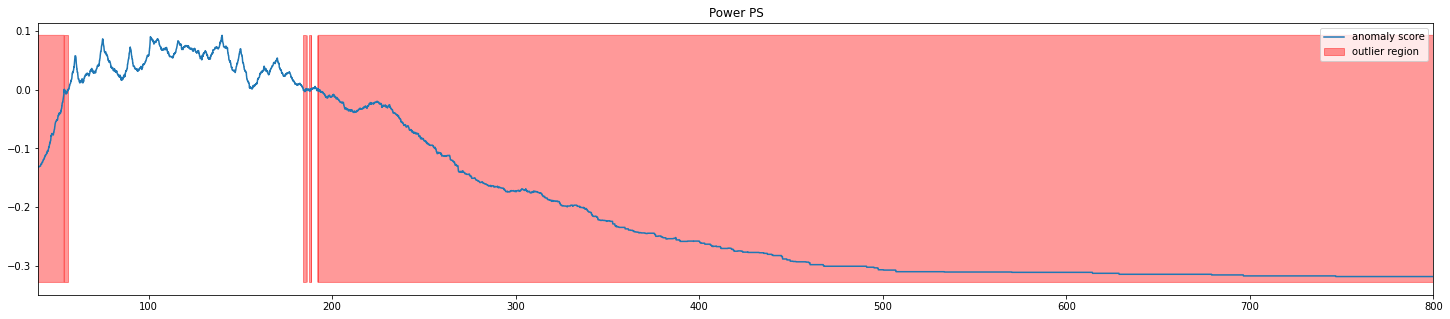

In [90]:
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(df2['powerPS'].values.reshape(-1,1))

xx = np.linspace(df2['powerPS'].min(), df2['powerPS'].max(), len(df)).reshape(-1,1)
print(xx)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(25,5))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
plt.legend()
plt.xlim(40, 800)
plt.title('Power PS')

In [91]:
df2 = df2[(df2['powerPS']<800) & (df2['powerPS']>40)]

If we see from the above plot, almost all data point above 200 seems to come under outliers, but dropping all of those does not seem to be a feasible solution. We can also see that data points after 800 have consistently very low anamoly score, so we can go ahead and drop those data points, and the remaining outliers can be handled further using transformation techniques. Also data points with powerps below 40 also seem to be very low as far as powerps of a used car is concerned, so we will also drop those data points which have powerps below 40.

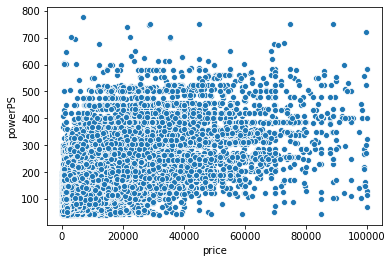

In [92]:
sns.scatterplot(x = 'price', y = 'powerPS',data = df2)

In [93]:
df2[['price','powerPS']].corr()

,price,powerPS
price,1.000000,0.593617
powerPS,0.593617,1.000000


### Brand

In [94]:
df2['brand'].describe()

count         252370
unique            39
top       volkswagen
freq           53210
Name: brand, dtype: object

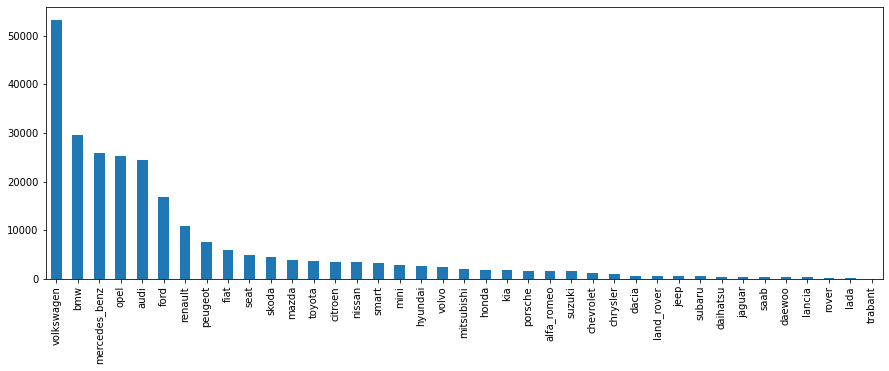

In [95]:
plt.figure(figsize=(15,5))
df2['brand'].value_counts(dropna = False).plot(kind = 'bar')

### Statistical Analysis
Is there any discrepancy in avg price with respect to brand.

H0 : avg_price_volkswagen = avg_price_bmw = avg_price_mercedes_benz = ..... = avg_price_trabant

H1 : avg_price_volkswagen != avg_price_bmw != avg_price_mercedes_benz != ..... != avg_price_trabant

In [96]:
oneway_posthoc('brand')

pvalue for brand is 0.0

Avg price of car for brand = volkswagen is  6277.342736327758
Avg price of car for brand = skoda is  7100.1044943820225
Avg price of car for brand = bmw is  9335.984087300247
Avg price of car for brand = peugeot is  3730.421324503311
Avg price of car for brand = mazda is  4740.982133741705
Avg price of car for brand = nissan is  5530.607269503546
Avg price of car for brand = renault is  2935.022870734608
Avg price of car for brand = ford is  4367.004062126643
Avg price of car for brand = mercedes_benz is  9289.46048626363
Avg price of car for brand = opel is  3523.2549763033176
Avg price of car for brand = seat is  5216.342880193626
Avg price of car for brand = honda is  4551.998429319372
Avg price of car for brand = fiat is  3411.5494729683783
Avg price of car for brand = mini is  10380.236072423399
Avg price of car for brand = smart is  4060.7421364061042
Avg price of car for brand = audi is  10189.274026614095
Avg price of car for brand = alfa_romeo is  4766

We can see from the oneway test that the price of used car is affected by brand as the pvalue is less than 0.05

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39]), <a list of 39 Text major ticklabel objects>)

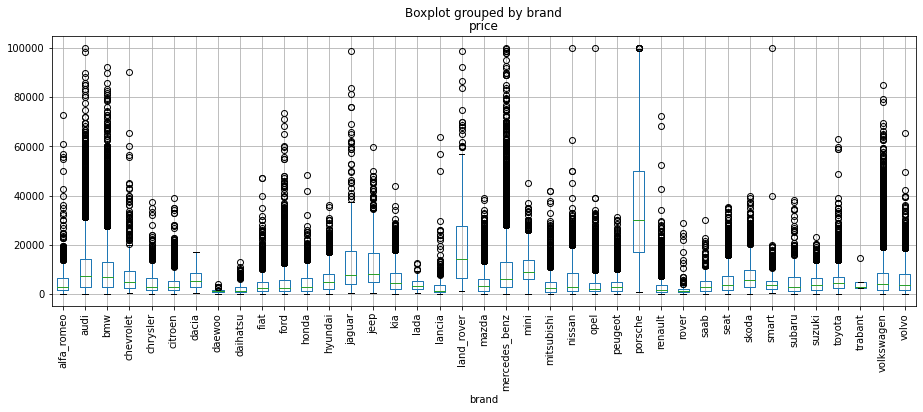

In [97]:
df2.boxplot(column='price',by = 'brand',figsize = (15,5))
plt.xticks(rotation = 90)

As we can see quite evidently that the average price of a used car varies significantly for different brands of vehicles.

### Month Of Registration

In [98]:
df2['monthOfRegistration'].describe()

count    252370.000000
mean          6.200202
std           3.458814
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: monthOfRegistration, dtype: float64

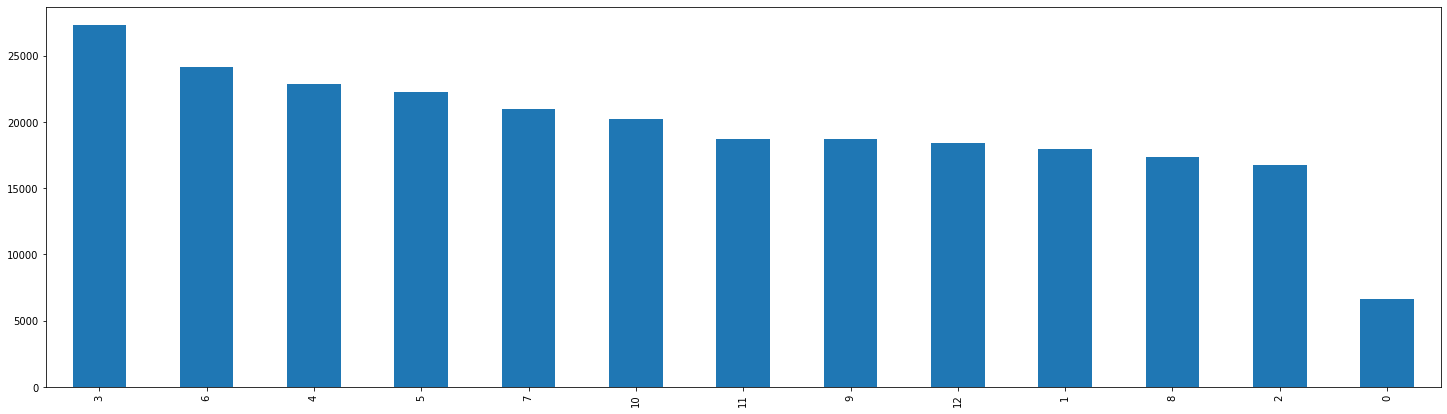

In [99]:
plt.figure(figsize=(25,7))
df2['monthOfRegistration'].value_counts(dropna = False).plot(kind = 'bar')

In [100]:
df2 = df2[df2['monthOfRegistration'] != 0]

We will be combining this column with yearOfRegistration to convert it to the age of vehicle

### Number of days online

In [101]:
val = list(df2['lastSeen'] - df2['dateCreated'])
days = [obj.days for obj in val]
for i in range(len(days)):
  if days[i] < 0:
    days[i] = np.nan
df2['No_of_days_online'] = days

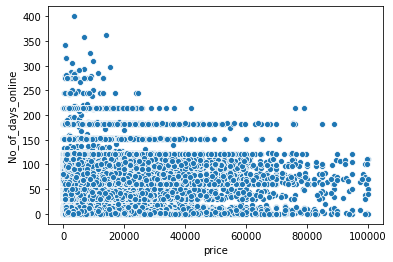

In [102]:
sns.scatterplot(x = 'price', y = 'No_of_days_online',data = df2)

In [103]:
df2[['price','No_of_days_online']].corr()

,price,No_of_days_online
price,1.000000,0.126455
No_of_days_online,0.126455,1.000000


### Age of Vehicle

In [104]:
import datetime

def calculateAge(yr,mnth):
    today_date = datetime.datetime.today()
    years = today_date.year - yr
    month = today_date.month - mnth
    ageindecimal = years + month/12
    return round(ageindecimal,2)

In [105]:
df2['ageOfVehicle'] = list(map(calculateAge,df2['yearOfRegistration'],df2['monthOfRegistration']))

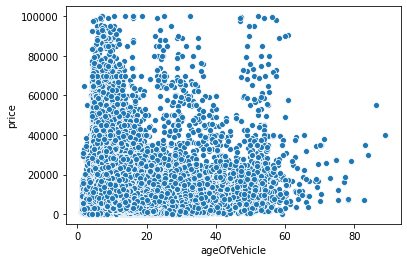

In [106]:
sns.scatterplot(y = 'price', x = 'ageOfVehicle',data = df2)

In [107]:
df2[['price','ageOfVehicle']].corr()

,price,ageOfVehicle
price,1.000000,-0.447501
ageOfVehicle,-0.447501,1.000000


## Finalizing features depending on EDA

In [108]:
df3 = df2[['kilometer','notRepairedDamage', 'vehicleType', 'fuelType', 'gearbox', 'ageOfVehicle', 'model', 'brand', 'powerPS', 'No_of_days_online', 'price']]

In [109]:
df3.head()

,kilometer,notRepairedDamage,vehicleType,fuelType,gearbox,ageOfVehicle,model,brand,powerPS,No_of_days_online,price
3,150000,No,small car,petrol,manual,19.00,golf,volkswagen,75,0.0,1500.0
4,90000,No,small car,diesel,manual,11.92,fabia,skoda,69,65.0,3600.0
5,150000,Yes,limousine,petrol,manual,24.67,3s,bmw,102,61.0,650.0
6,150000,No,convertible,petrol,manual,15.83,2series,peugeot,109,121.0,2200.0
10,150000,No,limousine,petrol,manual,15.50,3series,mazda,105,70.0,2000.0


In [110]:
get_missing_val_count_df(df3)

,count
No_of_days_online,50130
vehicleType,4609
kilometer,0
notRepairedDamage,0
fuelType,0
gearbox,0
ageOfVehicle,0
model,0
brand,0
powerPS,0


## Imputation of vehicle type

In [111]:
# cat_cols = ['notRepairedDamage', 'vehicleType', 'fuelType', 'gearbox', 'model', 'brand']
cat_cols = ['vehicleType', 'model', 'brand']

Using model, brand and price to impute missing values of vehicle type.

In [112]:
from sklearn.preprocessing import OrdinalEncoder
# Create dictionary for Ordinal encoders
ordinal_enc_dict = {}
# Loop over columns to encode
for col_name in cat_cols:
  # Create ordinal encoder for the column
  ordinal_enc_dict[col_name] = OrdinalEncoder()
  # Select the nin-null values in the column
  col = df3[col_name]
  col_not_null = col[col.notnull()]
  reshaped_vals = col_not_null.values.reshape(-1, 1)
  # Encode the non-null values of the column
  encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
  # Replace the ambience column with ordinal values
  df3.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [113]:
from sklearn.impute import KNNImputer
KNN_imputer = KNNImputer(n_neighbors=20)
df3_KNN = df3[['vehicleType', 'model', 'brand','price']].copy(deep=True)
df3_KNN.iloc[:, :] = np.round(KNN_imputer.fit_transform(df3_KNN))

In [114]:
for col in cat_cols:
  reshaped_col = df3_KNN[col].values.reshape(-1, 1)
  df3_KNN[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col)

In [115]:
df_final = df3.copy(deep=True)

In [116]:
df_final.loc[:,cat_cols] = df3_KNN[cat_cols]

In [117]:
df_final.reset_index(drop=True)

,kilometer,notRepairedDamage,vehicleType,fuelType,gearbox,ageOfVehicle,model,brand,powerPS,No_of_days_online,price
0,150000,No,small car,petrol,manual,19.00,golf,volkswagen,75,0.0,1500.0
1,90000,No,small car,diesel,manual,11.92,fabia,skoda,69,65.0,3600.0
2,150000,Yes,limousine,petrol,manual,24.67,3s,bmw,102,61.0,650.0
3,150000,No,convertible,petrol,manual,15.83,2series,peugeot,109,121.0,2200.0
4,150000,No,limousine,petrol,manual,15.50,3series,mazda,105,70.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...
245732,150000,No,limousine,diesel,manual,9.92,golf,volkswagen,140,NaN,7900.0
245733,150000,Yes,limousine,petrol,manual,16.08,leon,seat,225,0.0,3200.0
245734,125000,No,convertible,petrol,automatic,20.25,fortwo,smart,101,184.0,1199.0
245735,150000,No,bus,diesel,manual,24.25,transporter,volkswagen,102,107.0,9200.0


In [118]:
get_missing_val_count_df(df_final)

,count
No_of_days_online,50130
kilometer,0
notRepairedDamage,0
vehicleType,0
fuelType,0
gearbox,0
ageOfVehicle,0
model,0
brand,0
powerPS,0
